# Inbound Call Volume in a  Call Center using Time Series Forcasting 

In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import os
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
sns.set(rc={'figure.figsize':(20,10)})
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import plotly.express as px
import plotly.io as pio; pio.renderers.default='notebook'
import pmdarima  
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [186]:
series= pd.read_excel('EstesData.xlsx' , sheet_name='Date Wise Data',  parse_dates=['Date'], index_col='Date', squeeze=True)  

In [187]:
series.head()

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count,Offered%,SL%
Date,,,,,
2020-01-01,10550.989566,6176,6092,0.585348,0.986399
2020-01-02,0.000000,0,0,-,-
2020-01-03,9669.070469,8835,8712,0.913738,0.986078
2020-01-04,9173.621264,9586,9447,1.04495,0.9855
2020-01-05,0.000000,0,0,-,-


In [188]:
type(series)

pandas.core.frame.DataFrame

In [189]:
series.corr()

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count
ForecastVolume,1.000000,0.971742,0.803947
OfferedVolume,0.971742,1.000000,0.807374
Volume within SL / Interval Met Count,0.803947,0.807374,1.000000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

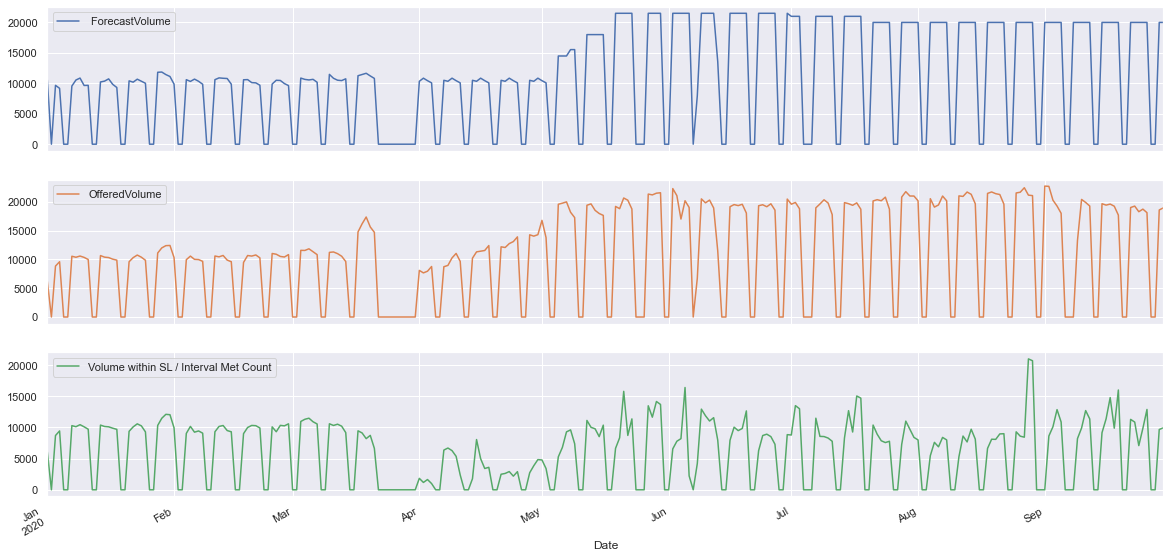

In [190]:
series.plot(subplots=True)

In [192]:
series.resample('W').mean()

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count
Date,,,
2020-01-05,5878.736260,4919.400000,4850.200000
2020-01-12,7180.499669,7399.285714,7243.142857
2020-01-19,7206.514745,7320.428571,7177.571429
2020-01-26,7374.624460,7263.285714,7088.857143
2020-02-02,8011.168383,8311.857143,7988.285714
2020-02-09,7396.716474,7160.000000,6715.000000
2020-02-16,7566.908755,7306.857143,6944.000000
2020-02-23,7294.636680,7388.714286,7079.428571
2020-03-01,7203.552968,7662.285714,7229.571429


<AxesSubplot:xlabel='Date'>

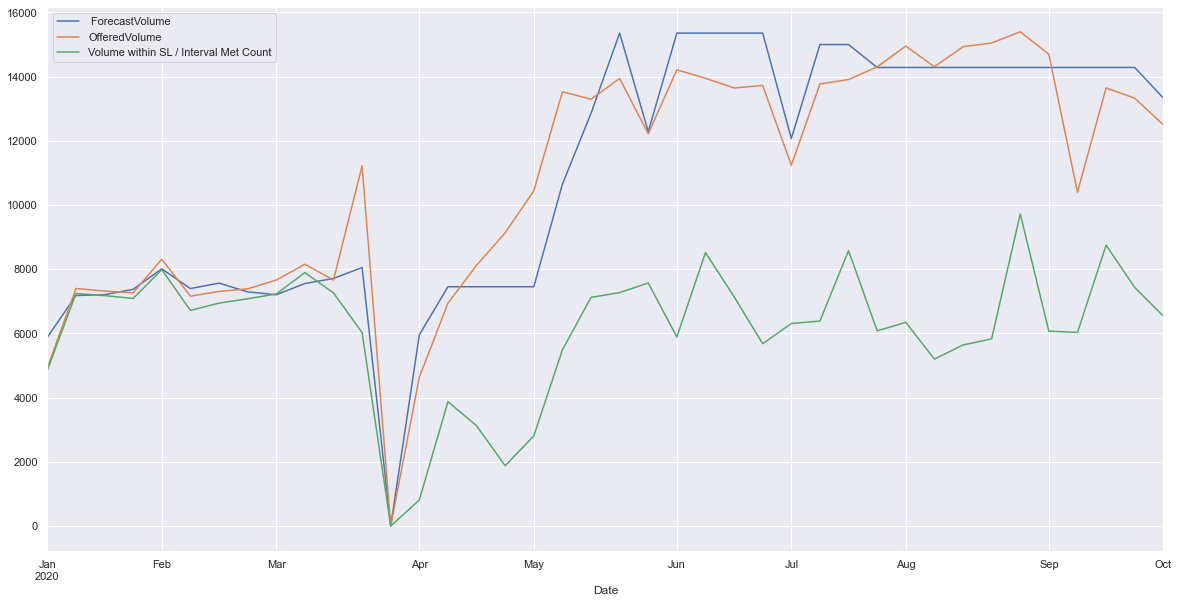

In [198]:
series.resample('W').mean().plot()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

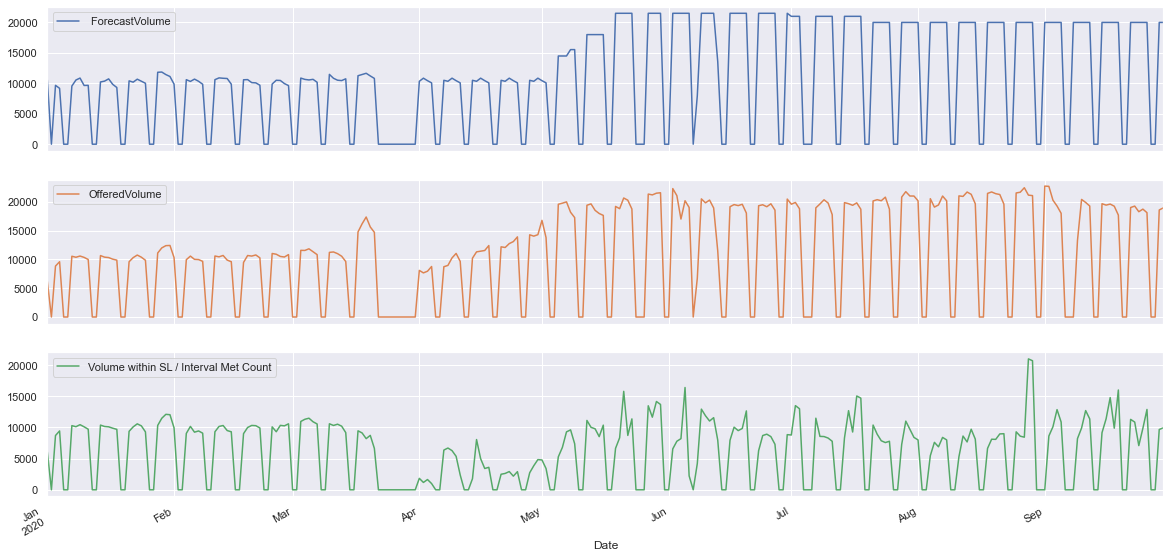

In [196]:
series.resample('D').mean().plot(subplots=True)

In [147]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2020-01-01 to 2020-09-30
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0    ForecastVolume                        274 non-null    float64
 1   OfferedVolume                          274 non-null    int64  
 2   Volume within SL / Interval Met Count  274 non-null    int64  
 3   Offered%                               274 non-null    object 
 4   SL%                                    274 non-null    object 
 5   OfferedVolume_diff                     267 non-null    float64
 6   OfferedVolume_log                      274 non-null    float64
 7   OfferedVolume_log_diff                 225 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 29.3+ KB


In [199]:
series_daily=series.resample('D').mean()
series_daily.head()

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count
Date,,,
2020-01-01,10550.989566,6176,6092
2020-01-02,0.000000,0,0
2020-01-03,9669.070469,8835,8712
2020-01-04,9173.621264,9586,9447
2020-01-05,0.000000,0,0


In [148]:
#series.drop(columns=[' ForecastVolume', 'Volume within SL / Interval Met Count', 'Offered%','SL%'], inplace= True)

In [200]:
#series.head()

# Tests for checking if series is stationary 

In [201]:
test_result=adfuller(series["OfferedVolume"])

In [202]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Offered):
    result=adfuller(Offered)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [203]:
adfuller_test(series['OfferedVolume'])

ADF Test Statistic : -1.5411522409296816
p-value : 0.5130646691971141
#Lags Used : 14
Number of Observations Used : 259
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [205]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)


kpss_test(series['OfferedVolume'])

Results of KPSS Test:
Test Statistic            1.234461
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


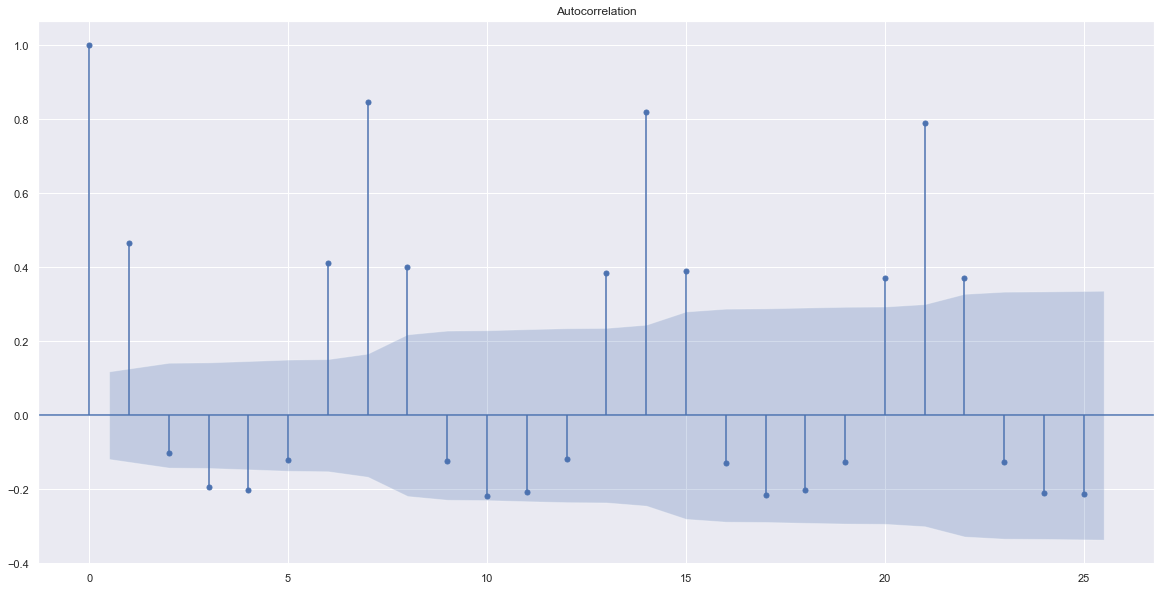

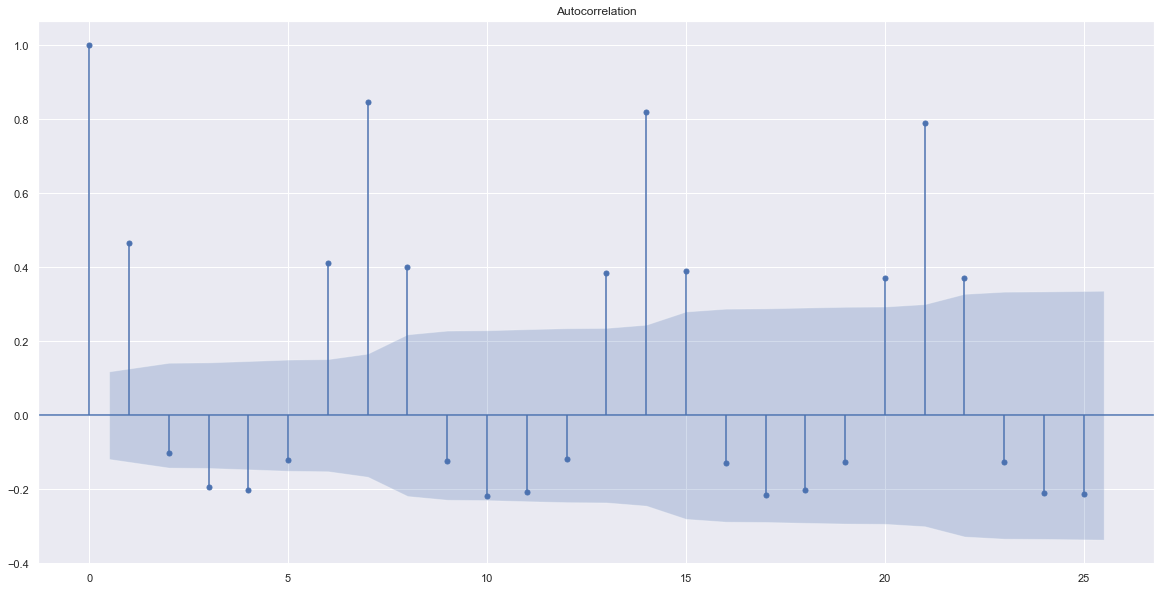

In [204]:
plot_acf(series['OfferedVolume'])

# Differencing

<AxesSubplot:xlabel='Date'>

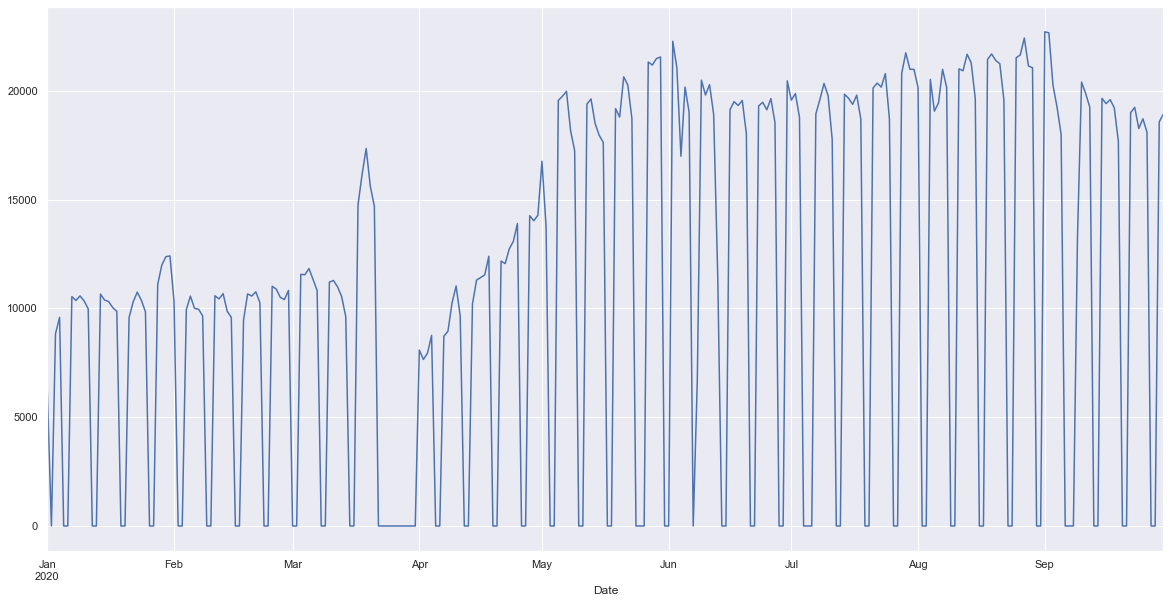

In [159]:
series['OfferedVolume_diff'] = series['OfferedVolume'] - series['OfferedVolume'].shift(1)
series['OfferedVolume'].dropna().plot()

Seasonal Differencing

<AxesSubplot:xlabel='Date'>

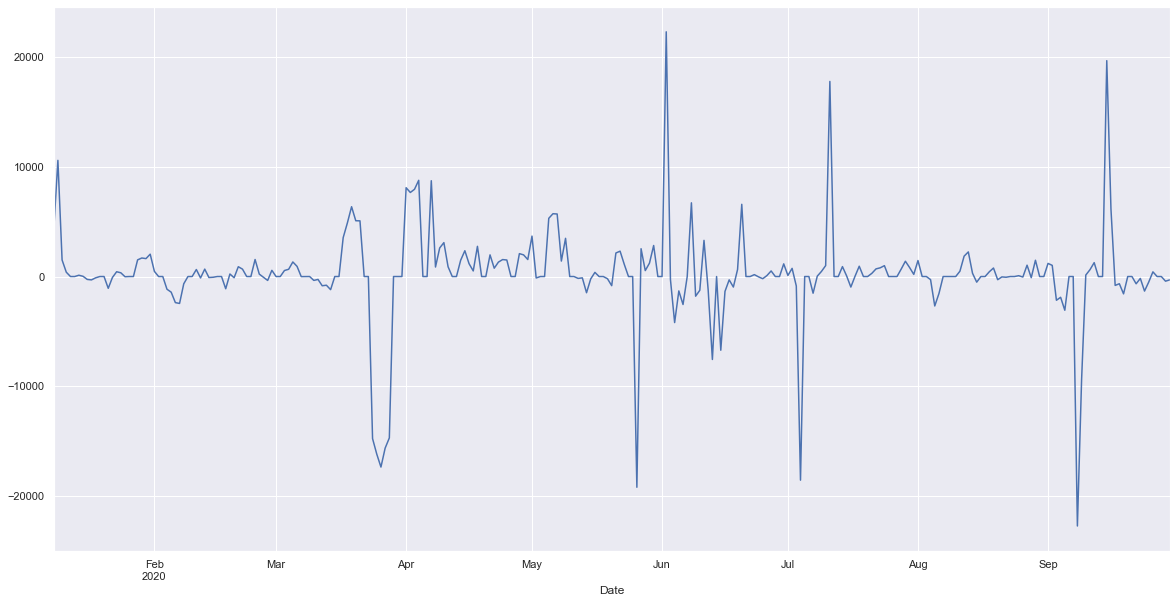

In [83]:
n=7
series['OfferedVolume_diff'] = series['OfferedVolume'] - series['OfferedVolume'].shift(n)
series['OfferedVolume_diff'].dropna().plot()

Transformation

<AxesSubplot:xlabel='Date'>

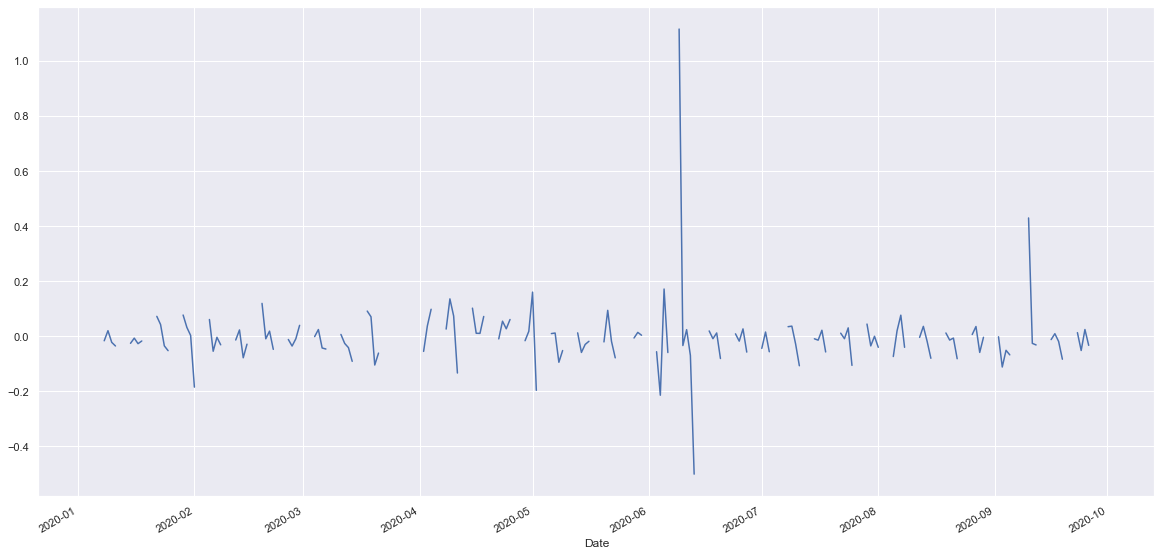

In [81]:
series['OfferedVolume_log'] = np.log(series['OfferedVolume'])
series['OfferedVolume_log_diff'] = series['OfferedVolume_log'] - series['OfferedVolume_log'].shift(1)
series['OfferedVolume_log_diff'].dropna().plot()

# ACF and PACF Graphs

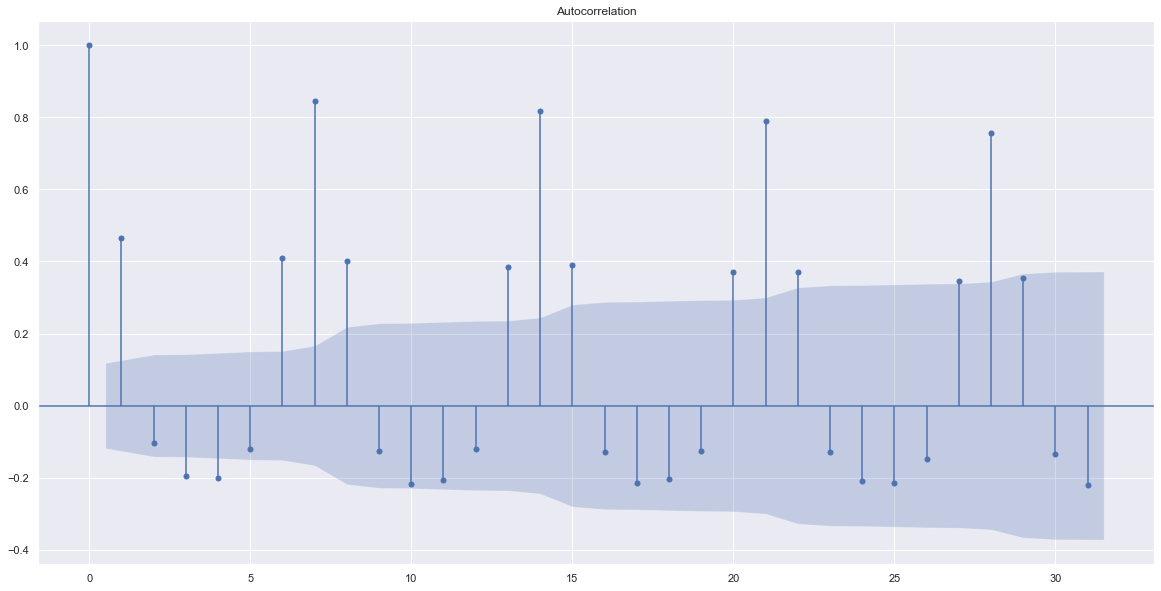

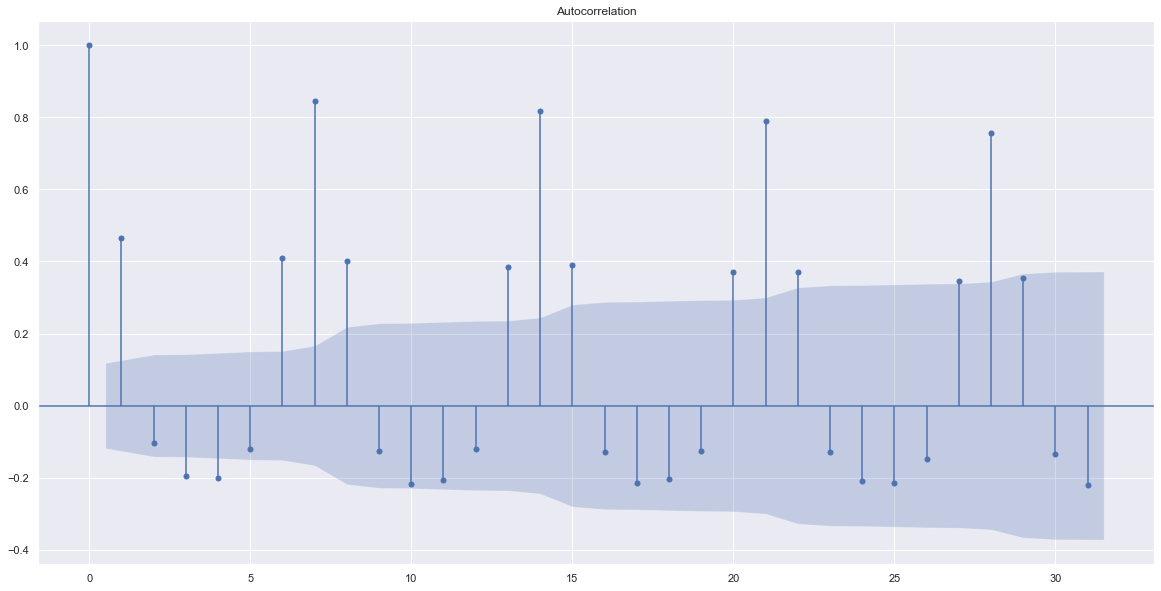

In [233]:
plot_acf(series['OfferedVolume'], lags=31)

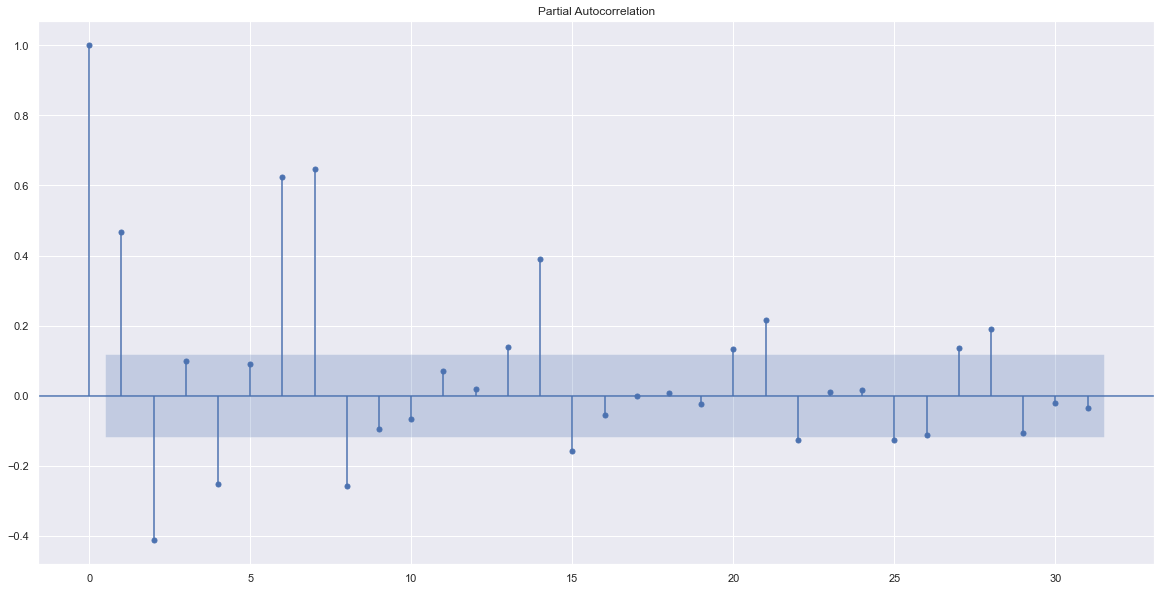

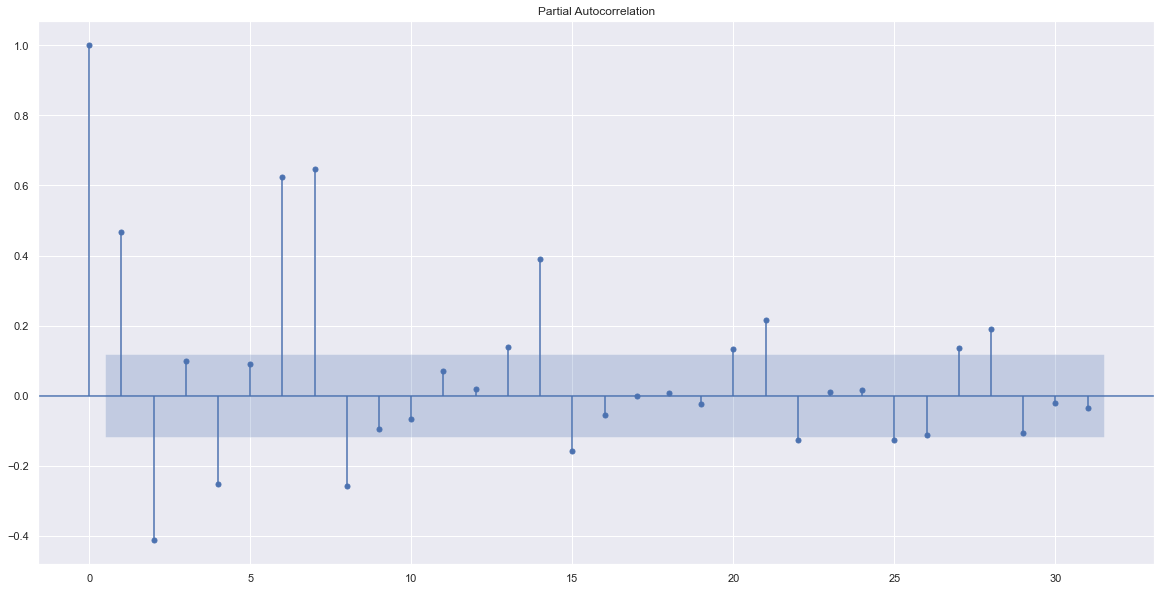

In [234]:
plot_pacf(series['OfferedVolume'],lags=31)

In [160]:
series_daily['OfferedVolume']

Date
2020-01-01     6176
2020-01-02        0
2020-01-03     8835
2020-01-04     9586
2020-01-05        0
              ...  
2020-09-26    18100
2020-09-27        0
2020-09-28        0
2020-09-29    18567
2020-09-30    18931
Freq: D, Name: OfferedVolume, Length: 274, dtype: int64

# Time Series - Auto Arima

In [24]:
from pmdarima.arima import auto_arima

In [245]:
model = auto_arima(series_daily['OfferedVolume'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5668.808, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5726.174, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5686.418, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5612.497, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5724.184, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5726.793, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=5615.094, Time=0.47 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=5612.237, Time=0.78 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=5668.791, Time=0.10 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=5551.872, Time=0.58 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=5556.652, Time=0.26 sec
 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept

In [246]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  274
Model:             SARIMAX(0, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -2769.936
Date:                            Tue, 06 Apr 2021   AIC                           5551.872
Time:                                    12:26:26   BIC                           5573.529
Sample:                                         0   HQIC                          5560.565
                                            - 274                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.6479     13.598      2.622      0.009       8.996      62.299
ma.L1         -0.3833      0.066     -5.780      0.000      -0.513      -0.253
ma.L2         -0.5582      0.061     -9.221      0.000      -0.677      -0.440
ma.S.L12      -0.3709      0.070     -5.316      0.000      -0.508      -0.234
ma.S.L24      -0.1900      0.084     -2.265      0.024      -0.354      -0.026
sigma2      4.038e+07   4.57e-06   8.84e+12      0.000    4.04e+07    4.04e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 1.32
Prob(Q):                              0.50   Prob(JB):                         0.52
Heteroskedasticity (H):               2.91   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.11e+28. Standard errors may be unstable.
"""

In [211]:
train=series_daily[(series_daily.index.get_level_values(0) <= '2020-07-31') ] #& (series_daily.index.get_level_values(0) <= '2020-07-31')]
test=series[(series_daily.index.get_level_values(0) > '2020-07-31')]

In [212]:
train.size

639

In [213]:
train 

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count
Date,,,
2020-01-01,10550.989566,6176,6092
2020-01-02,0.000000,0,0
2020-01-03,9669.070469,8835,8712
2020-01-04,9173.621264,9586,9447
2020-01-05,0.000000,0,0
...,...,...,...
2020-07-27,0.000000,0,0
2020-07-28,20000.000000,20804,7283
2020-07-29,20000.000000,21742,11020


In [214]:
test

,ForecastVolume,OfferedVolume,Volume within SL / Interval Met Count,Offered%,SL%
Date,,,,,
2020-08-01,20000.0,20152,8005,1.0076,0.397231
2020-08-02,0.0,0,0,-,-
2020-08-03,0.0,0,0,-,-
2020-08-04,20000.0,20523,5471,1.02615,0.266579
2020-08-05,20000.0,19062,7617,0.9531,0.399591
...,...,...,...,...,...
2020-09-26,20000.0,18100,12893,0.905,0.71232
2020-09-27,0.0,0,0,-,-
2020-09-28,0.0,0,0,-,-


In [215]:
model.fit(train['OfferedVolume'])

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [216]:
forecast=model.predict(n_periods=61, return_conf_int=True)

In [217]:
forecast

(array([18421.93020726, 11674.73494671, 13041.25958415, 13782.07654286,
        15769.28166594, 17774.01084297, 17321.92989923, 18563.09639069,
        15010.20461784, 12841.86098721, 13867.76758698, 16985.2808732 ,
        17590.82733812, 14361.24546557, 14943.96498949, 15156.57844229,
        15126.02834618, 15947.43194934, 17945.71599954, 18301.26561991,
        15646.78211443, 15019.67670276, 15389.474763  , 15734.69143676,
        16175.09281868, 16340.96054546, 16387.837033  , 16434.71352055,
        16481.5900081 , 16528.46649565, 16575.3429832 , 16622.21947074,
        16669.09595829, 16715.97244584, 16762.84893339, 16809.72542094,
        16856.60190849, 16903.47839603, 16950.35488358, 16997.23137113,
        17044.10785868, 17090.98434623, 17137.86083378, 17184.73732132,
        17231.61380887, 17278.49029642, 17325.36678397, 17372.24327152,
        17419.11975907, 17465.99624661, 17512.87273416, 17559.74922171,
        17606.62570926, 17653.50219681, 17700.37868436, 17747.25

In [219]:
forecast_df = pd.DataFrame(forecast[0].transpose(),index = test.index,columns=['Prediction'])

In [224]:
forecast_df.to_csv('WNS_AUGSEPT1.csv',index=True)

<AxesSubplot:xlabel='Date'>

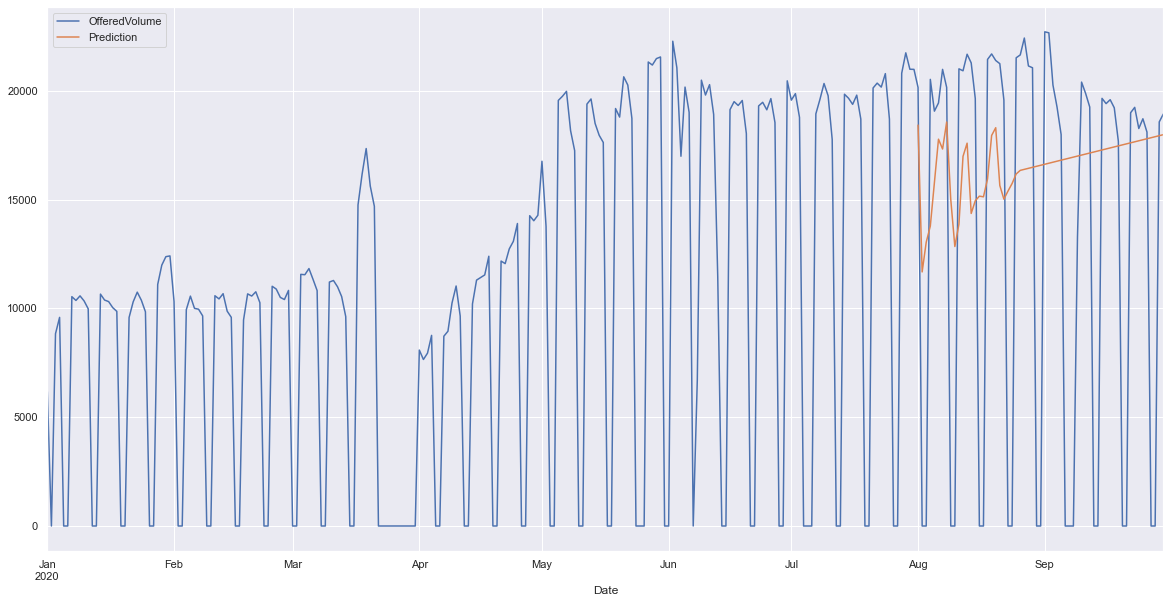

In [225]:
pd.concat([series_daily['OfferedVolume'],forecast_df],axis=1).plot()

Forecast for October ,November ,December 

In [226]:
forecast1=model.predict(n_periods=90, return_conf_int=True)

In [227]:
forecast1

(array([18421.93020726, 11674.73494671, 13041.25958415, 13782.07654286,
        15769.28166594, 17774.01084297, 17321.92989923, 18563.09639069,
        15010.20461784, 12841.86098721, 13867.76758698, 16985.2808732 ,
        17590.82733812, 14361.24546557, 14943.96498949, 15156.57844229,
        15126.02834618, 15947.43194934, 17945.71599954, 18301.26561991,
        15646.78211443, 15019.67670276, 15389.474763  , 15734.69143676,
        16175.09281868, 16340.96054546, 16387.837033  , 16434.71352055,
        16481.5900081 , 16528.46649565, 16575.3429832 , 16622.21947074,
        16669.09595829, 16715.97244584, 16762.84893339, 16809.72542094,
        16856.60190849, 16903.47839603, 16950.35488358, 16997.23137113,
        17044.10785868, 17090.98434623, 17137.86083378, 17184.73732132,
        17231.61380887, 17278.49029642, 17325.36678397, 17372.24327152,
        17419.11975907, 17465.99624661, 17512.87273416, 17559.74922171,
        17606.62570926, 17653.50219681, 17700.37868436, 17747.25

In [228]:
forecast_range=pd.date_range(start='2020-10-01', periods=90,freq='D')

In [229]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

In [321]:
forecast1_df.to_csv('WNS_OCTNOVDEC.csv',index=True)

<AxesSubplot:xlabel='Date'>

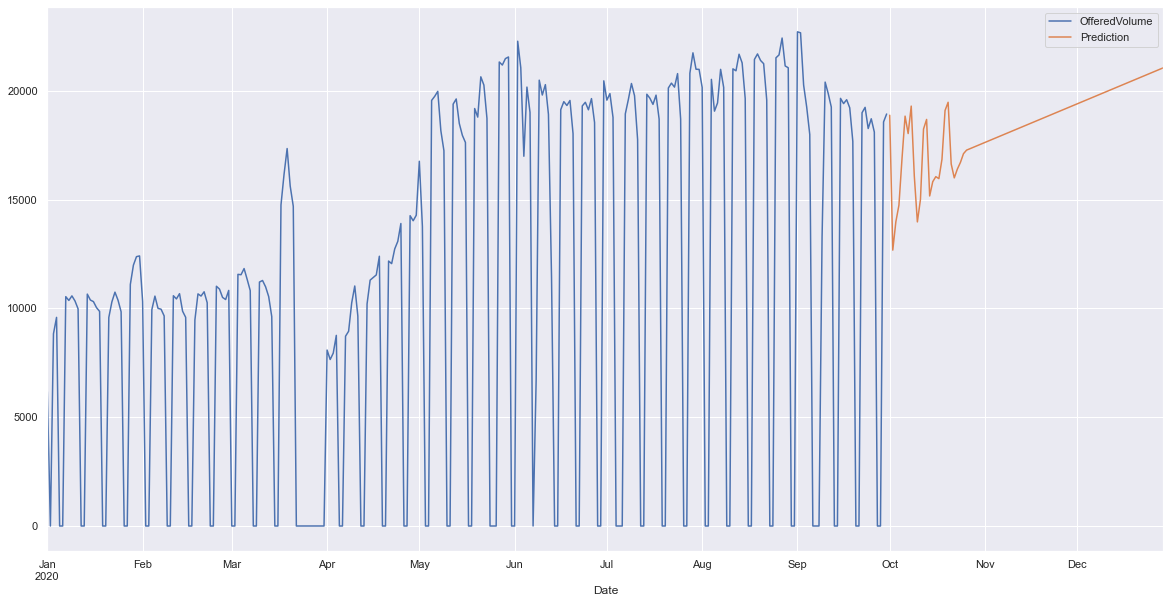

In [180]:
pd.concat([series_daily['OfferedVolume'],forecast1_df],axis=1).plot()

In [181]:
lower=pd.Series(forecast1[1][:, 0], index =forecast_range)
upper=pd.Series(forecast1[1][:, 1], index =forecast_range)

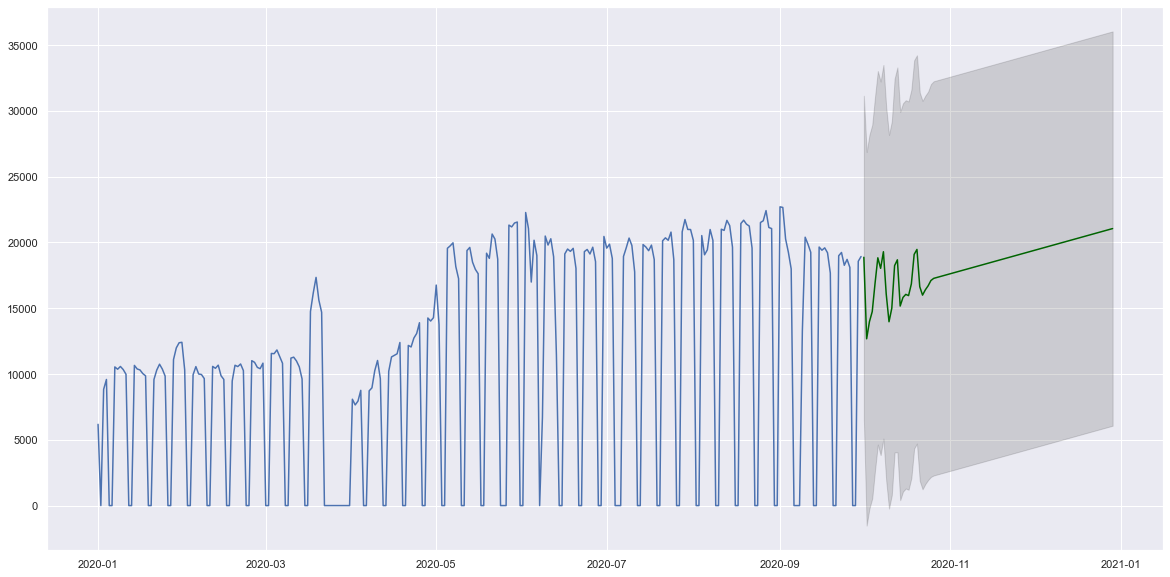

In [182]:
plt.plot(series_daily['OfferedVolume'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

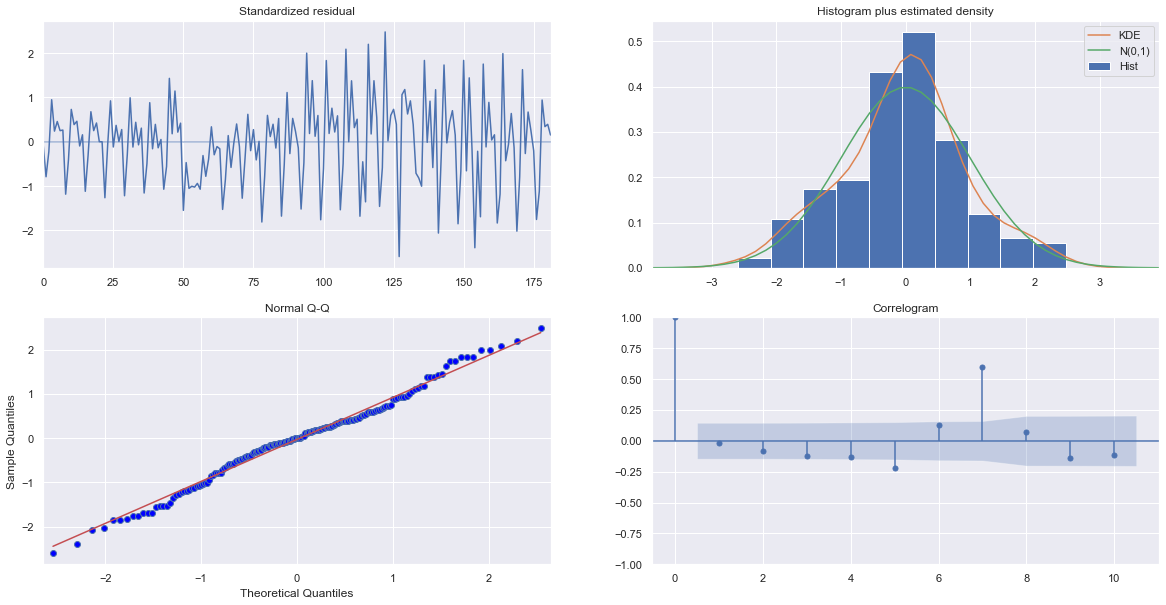

In [206]:
out=model.plot_diagnostics()